# 2732 - Erik Lucas Da Rocha | Lista 1 - Shapely

---

### Bibliotecas utilizadas

In [1]:
import shapely
import shapely.wkt

---

# 1 - Geometrias com strings WKT

#### 1 - a) Crie uma geometria que represente um quadrado e exiba seu resultado.

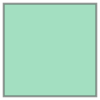

In [2]:
square = shapely.wkt.loads('POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))')
square

#### 1 - b) Crie uma geometria que represente um ponto (que deve estar no interior do quadrado criado anteriormente)

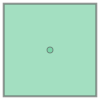

In [3]:
square_with_dot = collection = shapely.wkt.loads('GEOMETRYCOLLECTION (POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0)), POINT (0.5 0.5))')
square_with_dot

#### 1 - c) Crie duas linhas que tenham como vértices os pontos opostos do quadrado criado anteriormente de maneira que elas se cruzem bem no meio do quadrado.

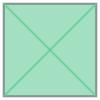

In [4]:
square_x = shapely.wkt.loads('GEOMETRYCOLLECTION (POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0)), LINESTRING (0 0, 1 1), LINESTRING (0 1, 1 0))')
square_x

#### 1 - (d) Para exibir todas as geometrias ao mesmo tempo, crie um objeto do tipo geometry collection e inclua todas as geometrias criadas anteriormente usando a sintaxe do wkt.

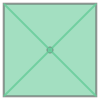

In [5]:
square_x_dot = shapely.wkt.loads('GEOMETRYCOLLECTION (POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0)), POINT (0.5 0.5), LINESTRING (0 0, 1 1), LINESTRING (0 1, 1 0))')
square_x_dot

---

# 2 - Geometrias com funções proprias

#### 2 - a) Crie pelo menos uma geometria para os tipos Point, MultiPoint, LineString, MultiLineString, Polygon, MultiPolygon.

In [6]:
point = shapely.geometry.Point((2, 0.5))
multipoint = shapely.geometry.MultiPoint([(2, 0.5), (1, 1), (-1, 0), (1, 0)])
linestring = shapely.geometry.LineString([(2, 0.5), (1, 1), (-1, 0), (1, -1)])
multilinestring = shapely.MultiLineString([[[0, 0], [1, 2]], [[4, 4], [5, 6]]])
polygon = shapely.geometry.Polygon([(0, 0), (0, -1), (7.5, -1), [7.5, 0], (0, 0)])
multipolygon = shapely.MultiPolygon([(((0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0)), [((0.1,0.1), (0.1,0.2), (0.2,0.2), (0.2,0.1))])])

#### 2 - b) Crie uma geometria do tipo geometrycollection a partir dos objetos de Point, Polygon e Linestring criados no item anterior

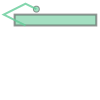

In [7]:
e2b = shapely.geometry.GeometryCollection([point, polygon, linestring])
e2b

#### 2 - c) Crie um Polygon em forma de retângulo que tenha um anel interno no formato de um triângulo.

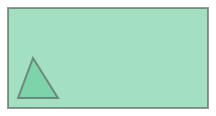

In [8]:
retangulo = shapely.geometry.Polygon([(0,0), (0,100), (200,100), (200, 0)])
triangulo = shapely.geometry.Polygon([(10,10), (25, 50), (50, 10)])
e2c = shapely.geometry.GeometryCollection([retangulo, triangulo])
e2c

#### 2 - (d) Um multipolígono não pode ter sobreposição entre seus elementos. Caso isso aconteça dizemos que a geometria não é válida. Podemos testar a validade de uma geometria usando a propriedade is_valid. Crie dois multipolígonos, um que seja válido e outro que seja inválido. Exiba-os na tela e também teste a validade de cada um utilizando a propriedade is_valid.

In [9]:
valido = shapely.MultiPolygon([(((0, 0), (0, 100), (100, 100), (100, 0)), [((10, 10), (10, 40), (40, 40), (40, 10))])])
invalido = shapely.MultiPolygon([(((0, 0), (0, 100), (100, 100), (100, 0)), [((-10, -10), (-10, 20), (20, 20), (20, -10))])])

True


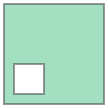

In [10]:
# Multipoligon valido
print(valido.is_valid)
valido

False


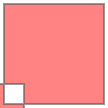

In [11]:
# Multipoligon invalido
print(invalido.is_valid)
invalido

#### 2 - e) Um objeto shapely possui uma propriedade .geom_type que informa seu tipo. Utilizando esta propriedade, verifique os tipos de objetos criados nesta questão

In [12]:
# Multipoligon valido
valido.geom_type

'MultiPolygon'

In [13]:
# Multipoligon invalido
invalido.geom_type

'MultiPolygon'

---

# 3 - Acessando coordenadas das geometrias

#### 3 - a) Exiba as coordenadas dos objetos que você criou na questão 2a.

In [14]:
# Point
list(point.coords)

[(2.0, 0.5)]

In [15]:
# LineString
list(linestring.coords)

[(2.0, 0.5), (1.0, 1.0), (-1.0, 0.0), (1.0, -1.0)]

---

# 4 - Derivando novas geometrias

#### 4 - a) Utilize a função convex_hull no multipoint criado na questão 2a.

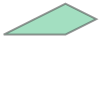

In [16]:
multipoint.convex_hull

#### 4 - b) Aplique a função de buffer passando a distância de 1 como parâmetro em cada objeto criado na questão 2a e observe o resultado obtido.

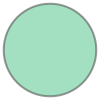

In [17]:
# Point
point.buffer(1)

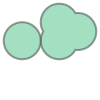

In [18]:
# MultiPoint
multipoint.buffer(1)

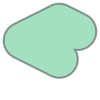

In [19]:
# LineString
linestring.buffer(1)

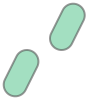

In [20]:
# MultiLineString
multilinestring.buffer(1)

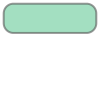

In [21]:
# Polygon
polygon.buffer(1)

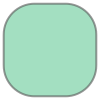

In [22]:
# MultiPolygon
multipolygon.buffer(1)

---

# 5 - Bandeira do Brasil

#### 5. Utilize as funções apresentadas hoje e crie uma geometria que represente a bandeira do Brasil (ignore os detalhes das estrelas e da faixa no círculo). Crie o retângulo, o losango e o círculo como objetos separados e depois combine-os em uma geometrycollection e exiba o resultado.

In [23]:
retangulo = shapely.geometry.Polygon([(0, 0), (0, 50), (100, 50), (100, 0)])
losango = shapely.geometry.Polygon([(5, 25), (50, 45), (95,25), (50, 5)])
circulo = shapely.geometry.Point(50, 25).buffer(12)
bandeira = shapely.geometry.GeometryCollection([retangulo, losango, circulo])

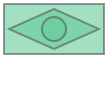

In [24]:
bandeira